In [11]:
import gymnasium as gym
import numpy as np

from stable_baselines3 import DDPG, TD3
from stable_baselines3.common.noise import NormalActionNoise

from utils import QValuesCallback

import matplotlib.pyplot as plt
import pandas as pd

env = gym.make("LunarLander-v3",
               continuous=True,
               gravity=-10.0,
               enable_wind=False,
               wind_power=15.0,
               turbulence_power=1.5)

_SEDD = 42

n_actions = env.action_space.shape[-1]

_action_noise = NormalActionNoise(mean=np.zeros(n_actions), sigma=0.1 * np.ones(n_actions))

_samplingSize = 1_000
_samplingFreq = 1000

_total_timesteps = 1_000_000


def run(constructor: DDPG | TD3, seed: int):
    env.reset(seed=_SEDD)
    model = constructor("MlpPolicy",
                        env,
                        action_noise=_action_noise,
                        verbose=0,
                        learning_rate=1e-3,
                        buffer_size=200000,
                        learning_starts=10000,
                        gamma=0.98,
                        n_steps=1,
                        seed=seed,
                        policy_kwargs=dict(net_arch=[400, 300]))
    

    callback = QValuesCallback(samplingSize=_samplingSize,
                               samplingFreq=_samplingFreq)
    model.learn(total_timesteps=_total_timesteps,
                callback=callback)
    return callback.qValues

seed = 42

In [14]:
qValuesDDPG = run(DDPG, seed)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 121      |
|    ep_rew_mean     | -222     |
| time/              |          |
|    episodes        | 4        |
|    fps             | 3768     |
|    time_elapsed    | 0        |
|    total_timesteps | 483      |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 112      |
|    ep_rew_mean     | -179     |
| time/              |          |
|    episodes        | 8        |
|    fps             | 3766     |
|    time_elapsed    | 0        |
|    total_timesteps | 899      |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 109      |
|    ep_rew_mean     | -162     |
| time/              |          |
|    episodes        | 12       |
|    fps             |

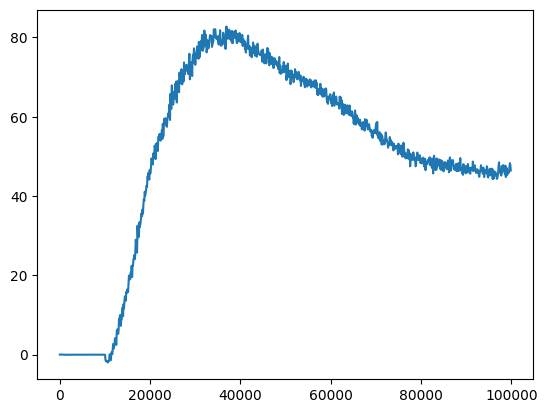

In [15]:
plt.plot(np.arange(0, _total_timesteps, _samplingFreq), qValuesDDPG)
plt.show()

In [5]:
len(np.arange(0, _total_timesteps, _samplingFreq))

100

In [6]:
len(qValuesDDPG)

101

In [20]:
qValuesTD3 = run(TD3, seed)

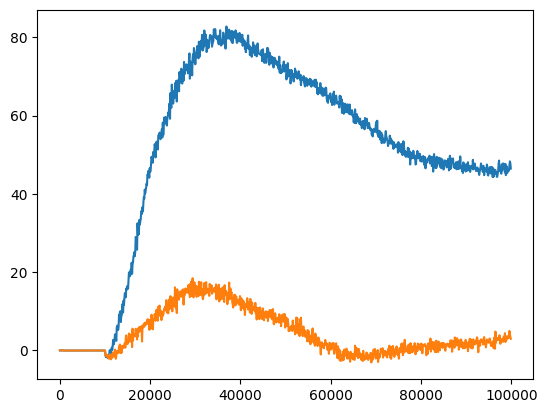

In [21]:
plt.plot(np.arange(0, _total_timesteps, _samplingFreq), qValuesDDPG)
plt.plot(np.arange(0, _total_timesteps, _samplingFreq), qValuesTD3)
plt.show()

In [22]:
qValuesDDPG2 = run(DDPG, 36)
qValuesTD32 = run(TD3, 36)

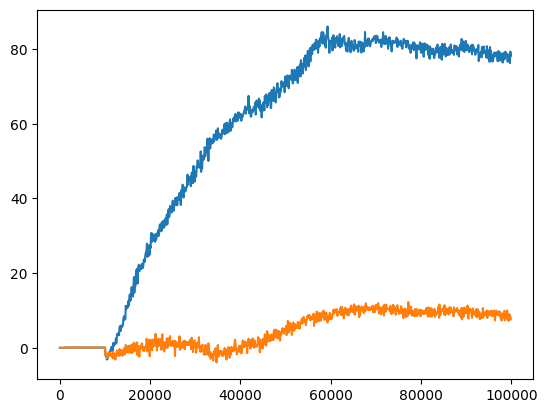

In [23]:

plt.plot(np.arange(0, _total_timesteps, _samplingFreq), qValuesDDPG2)
plt.plot(np.arange(0, _total_timesteps, _samplingFreq), qValuesTD32)
plt.show()

In [6]:
qValuesDDPG2 = run(DDPG, 292)
qValuesTD32 = run(TD3, 292)

/Users/abi/Desktop/course/master3/IAR/TMETest/lunarLander/utils.py:30: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  obss = th.tensor(obss, device=self.model.device).float()


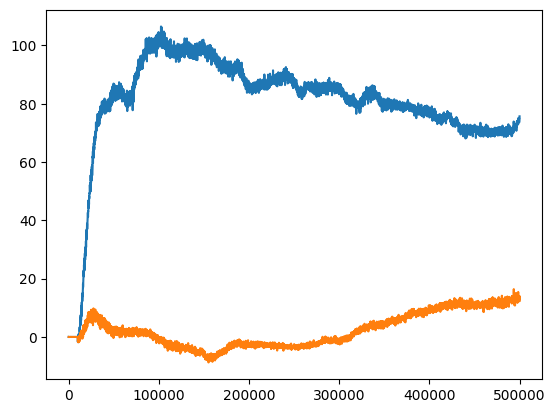

In [7]:

plt.plot(np.arange(0, _total_timesteps, _samplingFreq), qValuesDDPG2)
plt.plot(np.arange(0, _total_timesteps, _samplingFreq), qValuesTD32)
plt.show()

In [9]:
qValuesDDPG4 = run(DDPG, 403)
qValuesTD34 = run(TD3, 403)

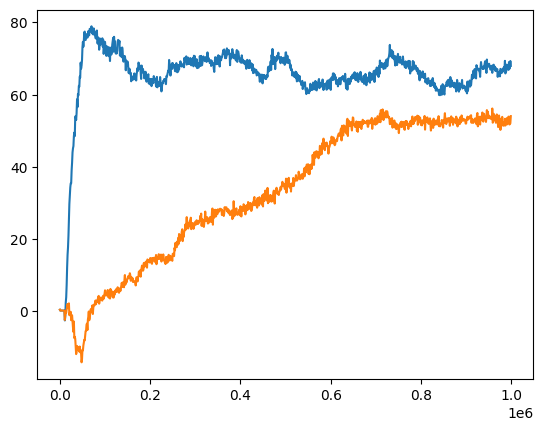

In [10]:
plt.plot(np.arange(0, _total_timesteps, _samplingFreq), qValuesDDPG4)
plt.plot(np.arange(0, _total_timesteps, _samplingFreq), qValuesTD34)
plt.show()

In [13]:
len(qValuesTD34)
np.arange(0, _total_timesteps, _samplingFreq)

array([     0,   1000,   2000,   3000,   4000,   5000,   6000,   7000,
         8000,   9000,  10000,  11000,  12000,  13000,  14000,  15000,
        16000,  17000,  18000,  19000,  20000,  21000,  22000,  23000,
        24000,  25000,  26000,  27000,  28000,  29000,  30000,  31000,
        32000,  33000,  34000,  35000,  36000,  37000,  38000,  39000,
        40000,  41000,  42000,  43000,  44000,  45000,  46000,  47000,
        48000,  49000,  50000,  51000,  52000,  53000,  54000,  55000,
        56000,  57000,  58000,  59000,  60000,  61000,  62000,  63000,
        64000,  65000,  66000,  67000,  68000,  69000,  70000,  71000,
        72000,  73000,  74000,  75000,  76000,  77000,  78000,  79000,
        80000,  81000,  82000,  83000,  84000,  85000,  86000,  87000,
        88000,  89000,  90000,  91000,  92000,  93000,  94000,  95000,
        96000,  97000,  98000,  99000, 100000, 101000, 102000, 103000,
       104000, 105000, 106000, 107000, 108000, 109000, 110000, 111000,
      

In [30]:
DDPGdata = {
    "niter": np.arange(0, _total_timesteps, _samplingFreq),
    "DDPG;seed=403": qValuesDDPG4,
    "TD3;seed=403": qValuesTD34
}

In [31]:
p = pd.DataFrame(DDPGdata)

In [32]:
p.to_csv("test.csv", index=False)

In [12]:
p2 = pd.read_csv("test.csv")

In [13]:
niter = p2["niter"]
qValuesDDPG = p2["DDPG;seed=403"]
qValuesTD3 = p2["TD3;seed=403"]

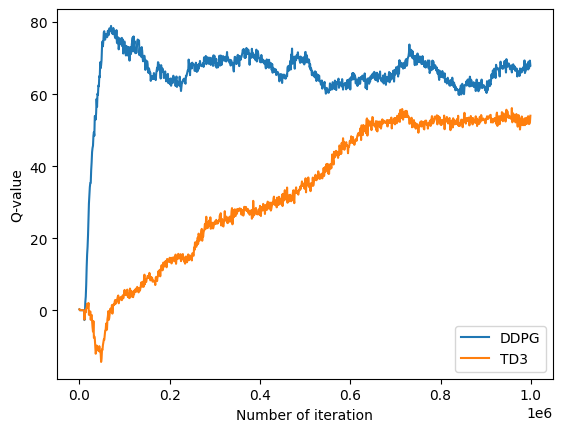

In [14]:
import matplotlib.pyplot as plt

plt.plot(niter, qValuesDDPG, label="DDPG")
plt.plot(niter, qValuesTD3, label="TD3")
plt.xlabel("Number of iteration")
plt.ylabel("Q-value")
plt.legend()
plt.show()